**Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.
Даны значения роста в трех группах случайно выбранных спортсменов:
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.**

Протестируем гипотезу:
$H_0$  - различий между группами нет, т.е.

$\mu_1 = \mu_2 = \mu_3$

Воспользуемся критерием Фишера:

$F_n=\frac{\sigma_ф^2}{\sigma_о^2}$ 

$\sigma_ф^2=\frac{S_ф^2}{k-1}$

$\sigma_о^2=\frac{S_о^2}{n-k}$

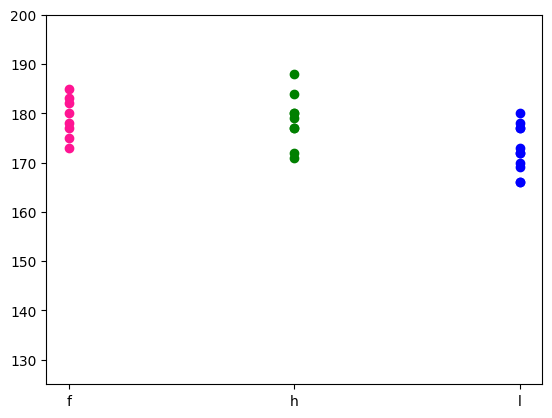

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

foot=np.array([173, 175, 180, 178, 177, 185, 183, 182])
hock=np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
lift=np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
total = np.hstack([foot, hock, lift])

k = 3
n = 28

plt.scatter(x = (['f','f','f','f','f','f','f','f']), y = foot, c = 'deeppink', marker = 'o')
plt.scatter(x = (['h','h','h','h','h','h','h','h','h']), y = hock, c = 'green', marker = 'o')
plt.scatter(x = (['l','l','l','l','l','l','l','l','l','l','l']), y = lift, c = 'blue', marker = 'o')
plt.ylim([125, 200])
plt.show()

In [12]:
#найдем средние значения
foot_mean = np.mean(foot)
hock_mean = np.mean(hock)
lift_mean = np.mean(lift)
total_mean = np.mean(total)

print(f' foot_mean = {foot_mean} \n hock_mean = {hock_mean} \n lift_mean = {lift_mean} \n total_mean = {total_mean}')

 foot_mean = 179.125 
 hock_mean = 178.66666666666666 
 lift_mean = 172.72727272727272 
 total_mean = 176.46428571428572


In [17]:
#Сумма квадратов отклонений наблюдений от общего среднего
print(np.sum((total - total_mean)**2))

830.9642857142854


In [13]:
#Сумма квадратов отклонений средних групповых зн. от общего среднего
S_f = np.sum((foot_mean - total_mean)**2)*8 + np.sum((hock_mean - total_mean)**2)*9 + np.sum((lift_mean - total_mean)**2)*11
print(f'S_f = {S_f}')

#Остаточная сумма квадратов отклонений
S_ost = np.sum((foot - foot_mean)**2) + np.sum((hock - hock_mean)**2) + np.sum((lift - lift_mean)**2)
print(f'S_ost = {S_ost}')

#Сложим сумму факторную с суммой остаточной = Сумма квадратов отклонений наблюдений от общего среднего
print(S_f + S_ost)

S_f = 253.9074675324678
S_ost = 577.0568181818182
830.964285714286


In [14]:
#Факторная дисперсия
D_f = S_f / (k-1)
print(f'D_f = {D_f}')

#Остаточная дисперсия
D_ost = S_ost / (n-k)
print(f'D_ost = {D_ost}')

D_f = 126.9537337662339
D_ost = 23.08227272727273


In [16]:
#Критерий Фишера наблюдаемый
F_n = D_f / D_ost
print(f'F_n = {F_n}')

F_n = 5.500053450812598


**Табличный критерий = 3,38 при уровне зн. 0,05**

3,38 < 5.5

**Гипотеза $H_0$ не подтвердилась, присутствуют ст. значимые различия** 

In [15]:
#проверка
f = stats.f_oneway(foot, hock, lift)
print(f'f = {f}')

f = F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)
